Khai báo thư viện và đọc thông tin từ file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv(r'C:\Users\Admin\Desktop\BTL_TDA\Data\diem_thi_2022.csv')

Tổng hợp thông tin thủ khoa các khối

In [5]:
khoi_map = {
    'A': ['Toán', 'Lý', 'Hoá'],
    'B': ['Toán', 'Hoá', 'Sinh'],
    'C': ['Văn', 'Sử', 'Địa'],
    'D': ['Toán', 'Văn', 'Ngoại Ngữ']
}
No1_list = []
for khoi, mon_list in khoi_map.items():
    if all(mon in df.columns for mon in mon_list): 
        if khoi == 'D' and 'ma_ngoai_ngu' in df.columns:  
            df_d = df[df['ma_ngoai_ngu'] == 'N1']  
            if not df_d.empty:  
                df_d[f'TongDiem_{khoi}'] = df_d[mon_list].sum(axis=1)  
                max_score = df_d[f'TongDiem_{khoi}'].idxmax()  

                No1_list.append({
                    'Khoi': khoi,
                    'sbd': df_d.loc[max_score, 'sbd'],
                    'TongDiem': df_d.loc[max_score, f'TongDiem_{khoi}']
                })
        else:
            df[f'TongDiem_{khoi}'] = df[mon_list].sum(axis=1) 
            max_score = df[f'TongDiem_{khoi}'].idxmax()

            No1_list.append({
                'Khoi': khoi,
                'sbd': df.loc[max_score, 'sbd'],
                'TongDiem': df.loc[max_score, f'TongDiem_{khoi}']
            })
thu_khoa_df = pd.DataFrame(No1_list)
print("Danh sách thủ khoa các khối:")
print(thu_khoa_df)

Danh sách thủ khoa các khối:
  Khoi       sbd  TongDiem
0    A   1068510     30.00
1    B   1018611     29.35
2    C  19000095     29.75
3    D  16002721     28.90


Tổng hợp thông tin thủ khoa tổ hợp

In [6]:
champion = []
df['tunhien'] = df[['Toán', 'Lý', 'Hoá', 'Văn', 'Ngoại Ngữ', 'Sinh']].sum(axis=1)
df['xahoi'] = df[['Toán', 'Văn', 'Ngoại Ngữ', 'Sử', 'Địa', 'GDCD']].sum(axis= 1)
max_tunhien_idx = df['tunhien'].idxmax()
thu_khoa_tunhien = df.loc[max_tunhien_idx, ['sbd', 'tunhien', 'province']]
max_xahoi_idx = df['xahoi'].idxmax()
thu_khoa_xahoi = df.loc[max_xahoi_idx, ['sbd', 'xahoi', 'province']]
champion = [
    {'Nhom': 'Tu Nhien', 'sbd': thu_khoa_tunhien['sbd'], 'TongDiem': thu_khoa_tunhien['tunhien'], 'Tỉnh' : thu_khoa_tunhien['province']},
    {'Nhom': 'Xa Hoi', 'sbd': thu_khoa_xahoi['sbd'], 'TongDiem': thu_khoa_xahoi['xahoi'], 'Tỉnh' : thu_khoa_xahoi['province']}
]
champion_df = pd.DataFrame(champion)
print("Danh sách thủ khoa:")
print(champion_df)

Danh sách thủ khoa:
       Nhom       sbd  TongDiem        Tỉnh
0  Tu Nhien  45003303     56.15  Ninh Thuận
1    Xa Hoi  27005570     56.85   Ninh Bình


Tổng hợp số thí sinh đạt điểm tối đa ở các môn

In [7]:
subject_columns = ['Toán', 'Văn', 'Ngoại Ngữ', 'Sinh', 'Lý', 'Hoá', 'Sử', 'Địa', 'GDCD']
Score10 = {subject : (df[subject] == 10).sum() for subject in subject_columns}
for subject, count in Score10.items():
    print(f'Số điểm 10 ở {subject} là {count}')

Số điểm 10 ở Toán là 35
Số điểm 10 ở Văn là 5
Số điểm 10 ở Ngoại Ngữ là 555
Số điểm 10 ở Sinh là 5
Số điểm 10 ở Lý là 154
Số điểm 10 ở Hoá là 158
Số điểm 10 ở Sử là 1779
Số điểm 10 ở Địa là 163
Số điểm 10 ở GDCD là 2836


Lập biểu đồ phân bố điểm ở các môn

In [8]:
subjects = ['Toán', 'Văn', 'Ngoại Ngữ', 'Lý', 'Hoá', 'Sinh', 'Sử', 'Địa', 'GDCD']
for subject in subjects:
    if subject in ['Toán', 'Ngoại Ngữ']:
        step = 0.2
    else:
        step = 0.25 
    all_score = [round(i * step, 2) for i in range(int(10 / step) + 1)]
    distribution_score = {score: (df[subject] == score).sum() for score in all_score}
    df_diem = pd.DataFrame(list(distribution_score.items()), columns=['Điểm', 'Số lượng'])
    fig = px.bar(
        df_diem,
        x='Điểm',
        y='Số lượng',
        title=f'Phân bố điểm môn {subject}',
        labels={'Điểm': 'Điểm', 'Số lượng': 'Số lượng thí sinh'},
        text='Số lượng'
    )
    fig.update_traces(
        textposition='outside',
        marker=dict(color='skyblue', line=dict(color='black', width=1))
    )
    fig.update_layout(
        xaxis=dict(tickangle=45),
        yaxis=dict(title='Số lượng thí sinh'),
        xaxis_title='Điểm',
        title_font_size=14,
        font=dict(size=12),
        width=1000,
        height=600  
    )
    fig.show()

Lập biểu đồ so sánh mức điểm ở các môn

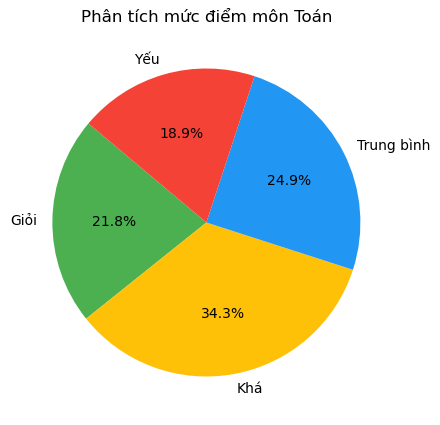

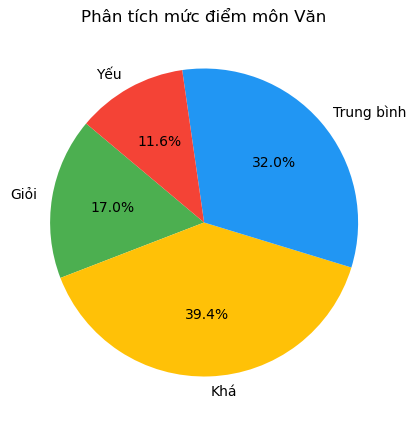

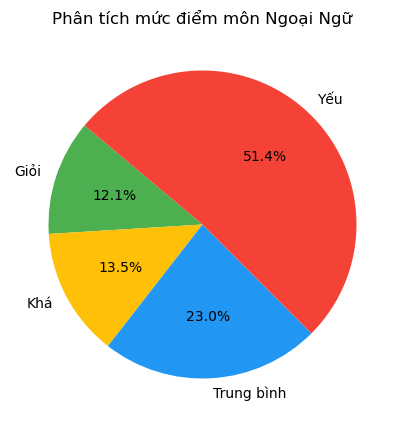

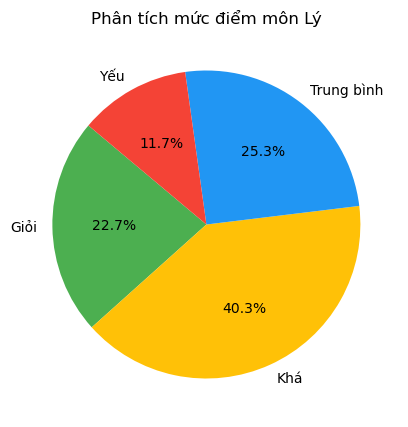

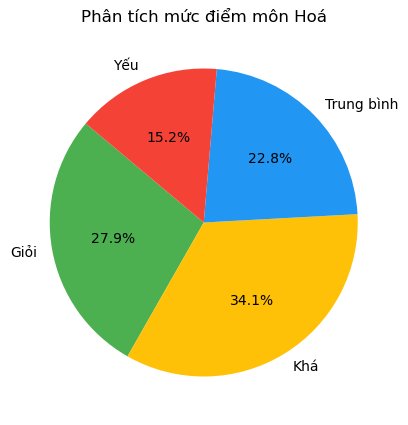

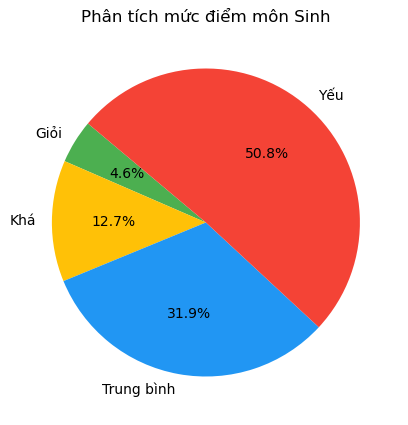

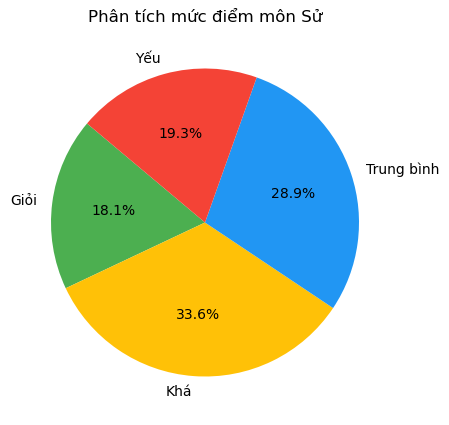

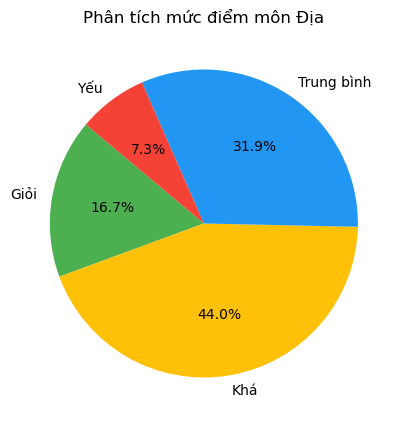

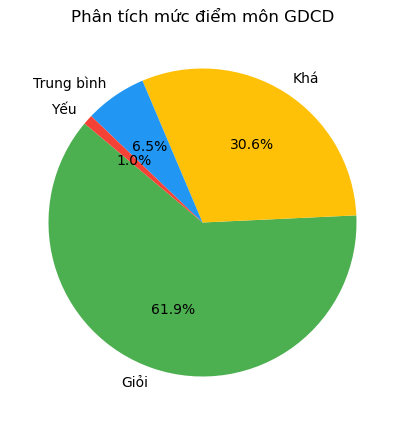

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
def classify(score):
    if score >= 8:
        return "Giỏi"
    elif score >= 6.5 and score < 8:
        return "Khá"
    elif score >= 5 and score < 6.5:
        return "Trung bình"
    else:
        return "Yếu"
subjects = ['Toán', 'Văn', 'Ngoại Ngữ', 'Lý', 'Hoá', 'Sinh', 'Sử', 'Địa', 'GDCD']
fixed_colors = {
    "Giỏi": "#4CAF50",       
    "Khá": "#FFC107",        
    "Trung bình": "#2196F3",
    "Yếu": "#F44336"         
}
for subject in subjects:
    if subject in df.columns:
        valid_scores = df[subject].dropna()
        if not valid_scores.empty:
            classified = valid_scores.apply(classify)
            counts = classified.value_counts()
            labels = list(fixed_colors.keys())
            sizes = [counts.get(label, 0) for label in labels]
            colors = [fixed_colors[label] for label in labels]
            plt.figure(figsize=(5, 5))
            plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
            plt.title(f"Phân tích mức điểm môn {subject}")
            plt.show()
        else:
            print(f"Môn {subject} không có dữ liệu hợp lệ.")